# Formula 1 - 2019 Season Analysis

### **Welcome to 2019 Season Analysis of Formula 1 Championship!**

**Here, we are going to tackle many aspects for how the season progressed and completed with 20 drivers, 10 teams and 21 race tracks throughout.**

We already know that British driver **Lewis Hamilton** clinched the championship title this season, which is his **6th** time in total. Plus, **Mercedes** won the constructor's title, **6th** time in a row! But, what about other teams? Like Ferrari, Red-Bull, McLaren, Renault... And, drivers? Like Vettel, Verstappen, Bottas, Leclerc, Raikkönen? How well did they perform this season with their drivers in the tracks? Is there any interesting results that we overlooked? All right then, we're going to find out here.

First of all, let's load the necessary modules and datasets to begin the analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f1_2019results = pd.read_csv("../Resources/2013-2023/RaceResults_2019.csv")
f1_2019drivers = pd.read_csv("../Resources/2013-2023/Drivers_2019.csv")
f1_2019tracks = pd.read_csv("../Resources/NOT-USED/formula1_2019season_tracks.csv")

The first question is to inspect **all drivers and teams** raced in 2019 season.

In [4]:
f1_2019drivers.loc[:,'Driver':'Country']

,Driver,Number,Team,Country
0,Lewis Hamilton,44,Mercedes,United Kingdom
1,Valtteri Bottas,77,Mercedes,Finland
2,Max Verstappen,33,Red Bull Racing,Netherlands
3,Charles Leclerc,16,Ferrari,Monaco
4,Sebastian Vettel,5,Ferrari,Germany
5,Carlos Sainz,55,McLaren,Spain
6,Pierre Gasly,10,Toro Rosso,France
7,Alexander Albon,23,Red Bull Racing,Thailand
8,Daniel Ricciardo,3,Renault,Australia
9,Sergio Perez,11,Racing Point,Mexico


In [5]:
print(f1_2019drivers['Team'].unique())

['Mercedes' 'Red Bull Racing' 'Ferrari' 'McLaren' 'Toro Rosso' 'Renault'
 'Racing Point' 'Alfa Romeo' 'Haas' 'Williams']


So, there are 20 drivers and, of course, 10 teams that competed in 2019 season. Next, let's see **all 21 tracks** and when they were held:

In [6]:
f1_2019tracks.loc[:, 'Country':'Date']

,Country,City,Circuit Name,Date
0,Australia,Melbourne,Albert Park Circuit,17 Mar 2019
1,Bahrain,Sakhir,Bahrain International Circuit,31 Mar 2019
2,China,Shanghai,Shanghai International Circuit,14 Apr 2019
3,Azerbaijan,Baku,Baku City Circuit,28 Apr 2019
4,Spain,Catalunya,Circuit de Barcelona-Catalunya,12 May 2019
5,Monaco,Monte Carlo,Circuit de Monaco,26 May 2019
6,Canada,Montréal,Circuit Gilles-Villeneuve,9 Jun 2019
7,France,La Castellet,Circuit Paul Ricard,23 Jun 2019
8,Austria,Spielberg,Red Bull Ring,30 Jun 2019
9,Great Britain,Silverstone,Silverstone Circuit,14 Jul 2019


Now, let's do some analysis on drivers for their F1 careers in lifetime. Here, we assume the information provided in the related dataset contains up to and including the 2019 season.

Who are the drivers in the grid that have already become **world champion**?

In [7]:
world_champions = f1_2019drivers[f1_2019drivers['World Championships'] != 0]
world_champions[['Driver', 'Team', 'World Championships']]

,Driver,Team,World Championships
0,Lewis Hamilton,Mercedes,6
4,Sebastian Vettel,Ferrari,4
11,Kimi Raikkönen,Alfa Romeo,1


Ah, only **3** drivers out there with a total of **11** world championships. I do remember that Kimi Raikkönen won the title in 2007 when he was driving for Ferrari. Sebastian Vettel claimed these from 2010 to 2013 while at Red-Bull Racing. And, Lewis Hamilton had the titles in 2008 with McLaren; in 2014, 2015, 2017, 2018 and 2019 with Mercedes. Notice that 2016's title was won by **Nico Rosberg** who was the teammate of Hamilton in the same team.

OK, who are the drivers that haven't started in **pole position** in their careers yet?

In [8]:
no_pole_pos = f1_2019drivers[f1_2019drivers['Highest Grid Position'] != 1]
no_pole_pos = no_pole_pos.sort_values('Highest Grid Position')
no_pole_pos[['Driver', 'Team', 'Highest Grid Position']]

,Driver,Team,Highest Grid Position
14,Lance Stroll,Racing Point,2
17,Romain Grosjean,Haas,2
6,Pierre Gasly,Toro Rosso,4
9,Sergio Perez,Racing Point,4
12,Daniil Kvyat,Toro Rosso,4
15,Kevin Magnussen,Haas,4
5,Carlos Sainz,McLaren,5
7,Alexander Albon,Red Bull Racing,5
10,Lando Norris,McLaren,5
16,Antonio Giovinazzi,Alfa Romeo,7


Whoa, there are lots of them, especially those whose highest grid are **4th** and **5th**! But, if we look at in the optimistic way, many drivers were close to start from the front row in such a race weekend, where Lance Stroll and Romain Grosjean already achieved that in their careers.

Now, which the drivers have stepped up to the **podium** at least 10 times in their careers?

In [9]:
podiums = f1_2019drivers[f1_2019drivers['Podiums'] >= 10]
podiums = podiums.sort_values('Podiums', ascending=False)
podiums[['Driver', 'Team', 'Podiums']]

,Driver,Team,Podiums
0,Lewis Hamilton,Mercedes,151
4,Sebastian Vettel,Ferrari,120
11,Kimi Raikkönen,Alfa Romeo,103
1,Valtteri Bottas,Mercedes,45
2,Max Verstappen,Red Bull Racing,31
8,Daniel Ricciardo,Renault,29
18,Robert Kubica,Williams,12
3,Charles Leclerc,Ferrari,10
17,Romain Grosjean,Haas,10


Well, it is certain to infer that drivers with championship titles have already exceeded 100 podiums! Bottas, Verstappen, Ricciardo are coming after them (but with a big gap behind). One thing attracts attention here, where **Charles Leclerc** has achieved to get 10 podium through his first season in Ferrari!

Now, which drivers have **won a race** but not more than 10 times in their careers?

In [10]:
def get_highest_finish(text):
    ind = text.index('(')
    res = text[:ind]
    return res

def get_hf_amount(text):
    ind1 = text.index('x')
    ind2 = text.index(')')
    res = text[ind1+1:ind2]
    return res

In [11]:
f1_2019drivers['Highest Finish'] = f1_2019drivers['Highest Race Finish'].apply(get_highest_finish).astype('int')
f1_2019drivers['HF Amount'] = f1_2019drivers['Highest Race Finish'].apply(get_hf_amount).astype('int')
drivers_lt10wins = f1_2019drivers[(f1_2019drivers['Highest Finish'] == 1) & (f1_2019drivers['HF Amount'] <= 10)]
drivers_lt10wins = drivers_lt10wins.sort_values('HF Amount', ascending=False)
drivers_lt10wins[['Driver', 'Team', 'HF Amount']]

,Driver,Team,HF Amount
2,Max Verstappen,Red Bull Racing,8
1,Valtteri Bottas,Mercedes,7
8,Daniel Ricciardo,Renault,7
3,Charles Leclerc,Ferrari,2
18,Robert Kubica,Williams,1


Ah yes, there are some remarkable results as well, such that Charles Leclerc in Ferrari scored **2 wins** in 2019 season. Bottas, Ricciardo and Verstappen are on their ways to reach the double digit. But, when did Kubica win a race which is still single in his career? It must have been about 10 years ago I suppose.

OK, it is time for some **visualization**! Let me plot the career points, podiums and grand prix entries for all drivers:

/var/folders/gj/f8l3k9n508qcl41lgx63rlp00000gn/T/ipykernel_13357/3198356725.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


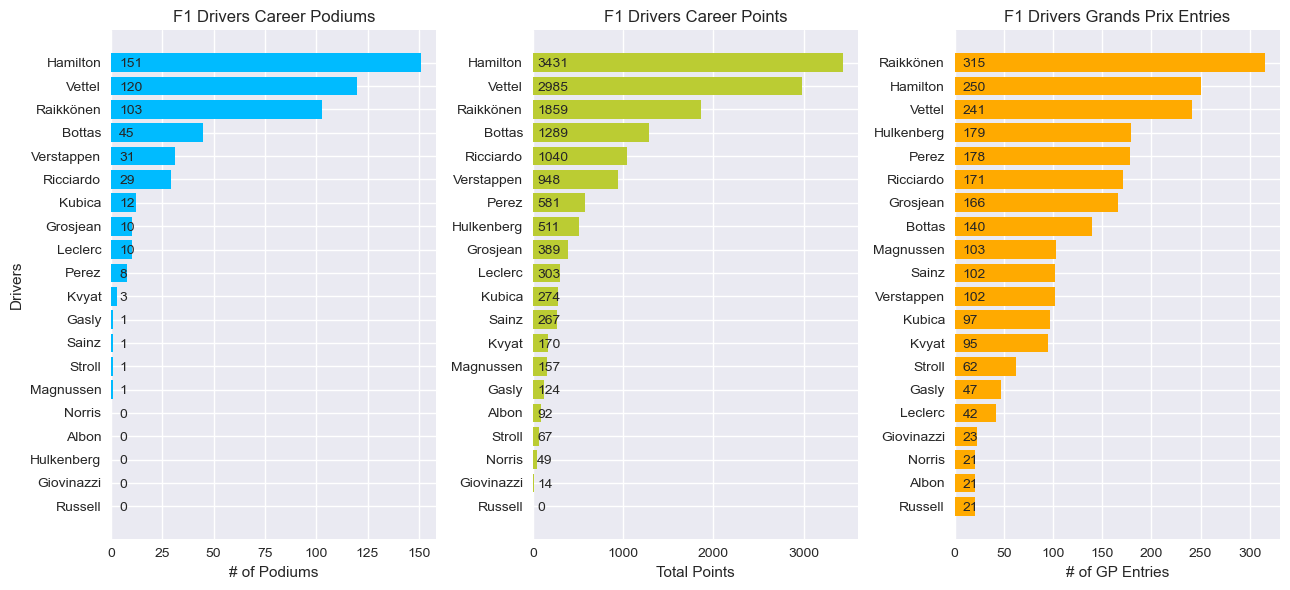

In [12]:
f1_2019drivers['Driver Surname'] = f1_2019drivers['Driver'].apply(lambda x: x.split(' ')[1])
plt.style.use('seaborn')
f1_2019drivers_podiums = f1_2019drivers[['Podiums', 'Driver Surname']].sort_values('Podiums').reset_index()
f1_2019drivers_points = f1_2019drivers[['Points', 'Driver Surname']].sort_values('Points').reset_index()
f1_2019drivers_GPentered = f1_2019drivers[['Grands Prix Entered', 'Driver Surname']].sort_values('Grands Prix Entered').reset_index()
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
plt.barh(f1_2019drivers_podiums['Driver Surname'], f1_2019drivers_podiums['Podiums'], color='#00bbff')
plt.title('F1 Drivers Career Podiums')
plt.xlabel('# of Podiums')
plt.ylabel('Drivers')
for i in range(20):
    plt.text(4, i-0.2, f1_2019drivers_podiums.loc[i,'Podiums'])
plt.subplot(1, 3, 2)
plt.barh(f1_2019drivers_points['Driver Surname'], f1_2019drivers_points['Points'], color='#bbcc33')
plt.title('F1 Drivers Career Points')
plt.xlabel('Total Points')
for i in range(20):
    plt.text(50, i-0.2, f1_2019drivers_points.loc[i, 'Points'])
plt.subplot(1, 3, 3)
plt.barh(f1_2019drivers_GPentered['Driver Surname'], f1_2019drivers_GPentered['Grands Prix Entered'], color='#ffaa00')
plt.title('F1 Drivers Grands Prix Entries')
plt.xlabel('# of GP Entries')
for i in range(20):
    plt.text(8, i-0.2, f1_2019drivers_GPentered.loc[i, 'Grands Prix Entered'])
plt.tight_layout()
plt.show()

Well, according to these numbers and columns above, what about their **correlations**?

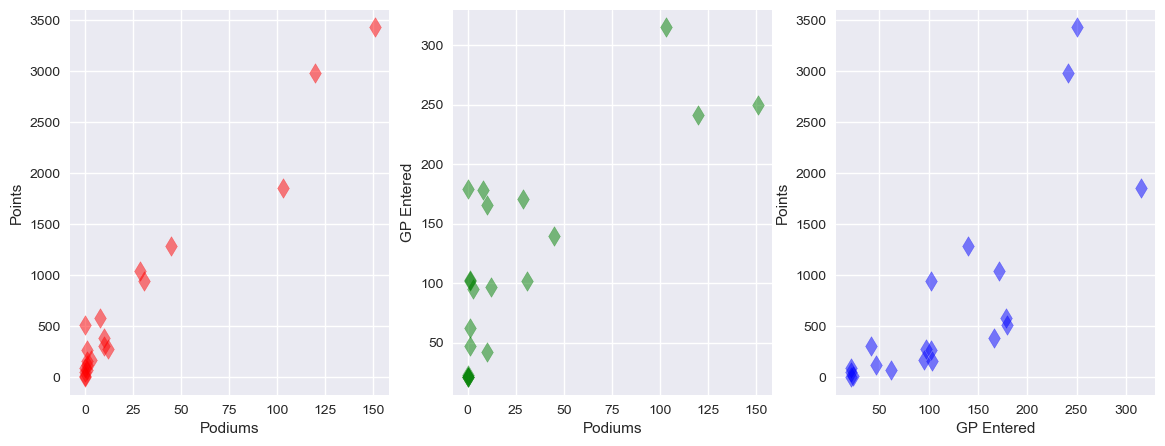

In [13]:
plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
plt.scatter(f1_2019drivers['Podiums'], f1_2019drivers['Points'], marker='d', color='red', s=100, alpha=0.5)
plt.xlabel('Podiums')
plt.ylabel('Points')
plt.subplot(1, 3, 2)
plt.scatter(f1_2019drivers['Podiums'], f1_2019drivers['Grands Prix Entered'], marker='d', color='green', s=100, alpha=0.5)
plt.xlabel('Podiums')
plt.ylabel('GP Entered')
plt.subplot(1, 3, 3)
plt.scatter(f1_2019drivers['Grands Prix Entered'], f1_2019drivers['Points'], marker='d', color='blue', s=100, alpha=0.5)
plt.xlabel('GP Entered')
plt.ylabel('Points')
plt.show()

Yeah, all of them are **positively** correlative! And, in numbers:

In [14]:
podiums = f1_2019drivers['Podiums'].values
points = f1_2019drivers['Points'].values
gp_entered = f1_2019drivers['Grands Prix Entered'].values
print("Podiums-Points Correlation: {:.4}".format(np.corrcoef(podiums, points)[0,1]))
print("Podiums-GP Entries Correlation: {:.4}".format(np.corrcoef(podiums, gp_entered)[0,1]))
print("GP Entries-Points Correlation: {:.4}".format(np.corrcoef(gp_entered, points)[0,1]))

Podiums-Points Correlation: 0.9797
Podiums-GP Entries Correlation: 0.7777
GP Entries-Points Correlation: 0.7964


From these numbers, this means, for example, that any driver who gets podiums can accumulate points in approximately the same ratio. Similar interepretations could be applied to others as well, but with slightly less correlation.

OK, that's enough for drivers; **let's move on to race tracks...**

Which ones' **lap records** have been broken in 2019 season?

In [15]:
lap_records_broken = f1_2019tracks[f1_2019tracks['Record Year'] == 2019]
lap_records_broken[['Country', 'City', 'Circuit Name', 'Lap Record', 'Record Owner']]

,Country,City,Circuit Name,Lap Record,Record Owner
3,Azerbaijan,Baku,Baku City Circuit,1:43.009,Charles Leclerc
6,Canada,Montréal,Circuit Gilles-Villeneuve,1:13.078,Valtteri Bottas
7,France,La Castellet,Circuit Paul Ricard,1:32.740,Sebastian Vettel
9,Great Britain,Silverstone,Silverstone Circuit,1:27.369,Lewis Hamilton
11,Hungary,Budapest,Hungaroring,1:17.103,Max Verstappen
15,Russia,Sochi,Sochi Autodrom,1:35.761,Lewis Hamilton
16,Japan,Suzuka,Suzuka International Racing Course,1:30.983,Lewis Hamilton
18,United States,Austin,Circuit of The Americas,1:36.169,Charles Leclerc
20,Abu Dhabi,Yas Island,Yas Marina Circuit,1:39.283,Lewis Hamilton


Oh, man! **9 different tracks** that have their lap records broken this season! Can you believe it? Well, thanks to the latest technology, power unit, aerodynamics, suspension, efficiency in high speeds and cornering, now F1 cars have become faster than ever! Perhaps, much more improved lap times will draw near for several race tracks...

_By the way, I wonder how these will change overall when 2021 Season arrives that there will be substantial revolution on F1 cars._

However, there are still some tracks such that their lap times haven't been improved **for more than 10 years**. Do you wonder what they are?

In [16]:
no_record_gt10years = f1_2019tracks[f1_2019tracks['Record Year'] < 2010]
no_record_gt10years[['Country', 'City', 'Circuit Name', 'Lap Record', 'Record Owner', 'Record Year']]

,Country,City,Circuit Name,Lap Record,Record Owner,Record Year
0,Australia,Melbourne,Albert Park Circuit,1:24.125,Michael Schumacher,2004
1,Bahrain,Sakhir,Bahrain International Circuit,1:31.447,Pedro de la Rosa,2005
2,China,Shanghai,Shanghai International Circuit,1:32.238,Michael Schumacher,2004
10,Germany,Hockenheim,Hockenheimring,1:13.780,Kimi Raikkönen,2004
13,Italy,Monza,Autodromo Nazionale Monza,1:21.046,Rubens Barrichello,2004


Yeah, it is surprising to see that these lap records still exists **even after 15 years**! Do you think they will be vanished in 2020?

Next, what are **the oldest tracks** that are still being raced today?

In [17]:
f1_2019tracks.sort_values('First Grand Prix')[['Country', 'City', 'Circuit Name', 'First Grand Prix']].head()

,Country,City,Circuit Name,First Grand Prix
13,Italy,Monza,Autodromo Nazionale Monza,1950
5,Monaco,Monte Carlo,Circuit de Monaco,1950
9,Great Britain,Silverstone,Silverstone Circuit,1950
12,Belgium,Spa-Francorchamps,Circuit de Spa-Francorchamps,1950
17,Mexico,Mexico City,Autodromo Hermanos Rodriguez,1963


Yep, the historical and iconic tracks: Italy, Monaco, Great Britain and Belgium. Although there are so old and lots of modifications have been made up until today, they are still **popular** for racing in F1 and even for other motorsport disciplines!

Now, let me take some average values among all tracks to interpret what a typical F1 driver does in each race:

In [18]:
print("In F1 2019 Season:")
print("One race could last {:.4} laps long.".format(f1_2019tracks['Number of Laps'].mean()))
print("The average length of all circuits is {:.4} km.".format(f1_2019tracks['Circuit Length'].mean()))
print("To complete the race, any driver must drive {:.4} km.".format(f1_2019tracks['Race Distance'].mean()))
print("One driver averagely takes {:.4} turns and uses {:.4} DRS zones every lap.".format(
    f1_2019tracks['Turns'].mean(), f1_2019tracks['DRS Zones'].mean()))

In F1 2019 Season:
One race could last 60.29 laps long.
The average length of all circuits is 5.177 km.
To complete the race, any driver must drive 304.8 km.
One driver averagely takes 16.76 turns and uses 2.19 DRS zones every lap.


Well, these numbers explains everything enough. However, **Monaco Grand Prix** seems to be an outlier here whose race distance is around 260 km, thus affecting the average race distance of all other races. If I drop the value, this average value should now be:

In [19]:
race_distances = f1_2019tracks['Race Distance'].values
race_distances = np.delete(race_distances, 5)
print("The average race distance without Monaco:", race_distances.mean(), "km")

The average race distance without Monaco: 307.0223 km


Yep, the number above... which is also appropriate for what FIA described for F1 rules in terms of race distance, that is at least 305 km.

We took the average, but what did a driver do in full season as we'll take the **total** now and assume no DNFs happened?

In [20]:
print("In all race tracks of F1 2019 Season:")
print("Any driver went up to {} laps.".format(f1_2019tracks['Number of Laps'].sum()))
print("They potantially travelled {} km in total.".format(f1_2019tracks['Race Distance'].sum()))
print("{} different turns have been taken and maximum {} different DRS zones have been used.".format(
    f1_2019tracks['Turns'].sum(), f1_2019tracks['DRS Zones'].sum()))

In all race tracks of F1 2019 Season:
Any driver went up to 1266 laps.
They potantially travelled 6400.732 km in total.
352 different turns have been taken and maximum 46 different DRS zones have been used.


Nothing to say more. How about more interesting stats, say, **standard deviations** of these parameters?

In [21]:
print("All race tracks' std. dev. in F1 2019 Season:")
print("Laps: {:.4}".format(f1_2019tracks['Number of Laps'].std()))
print("Race Distance: {:.4}".format(f1_2019tracks['Race Distance'].std()))
print("Turns: {:.4} ".format(f1_2019tracks['Turns'].std()))
print("DRS Zones: {:.4}".format(f1_2019tracks['DRS Zones'].std()))

All race tracks' std. dev. in F1 2019 Season:
Laps: 9.051
Race Distance: 10.29
Turns: 3.145 
DRS Zones: 0.6016


I'm aware that F1 race tracks usually have **2 DRS zones**, but some could have 3 or only 1. So, let me distinguish these tracks and see what they are:

In [22]:
DRS_zones_by_tracks = {1: [], 2: [], 3: []}
for i in range(len(f1_2019tracks)):
    if f1_2019tracks.loc[i, 'DRS Zones'] == 1:
        zones = 1
    elif f1_2019tracks.loc[i, 'DRS Zones'] == 3:
        zones = 3
    else:
        zones = 2
    DRS_zones_by_tracks[zones].append(f1_2019tracks.loc[i, 'Country'])
DRS_zones_by_tracks

{1: ['Monaco', 'Japan'],
 2: ['China',
  'Azerbaijan',
  'Spain',
  'France',
  'Great Britain',
  'Germany',
  'Hungary',
  'Belgium',
  'Italy',
  'Russia',
  'United States',
  'Brazil',
  'Abu Dhabi'],
 3: ['Australia', 'Bahrain', 'Canada', 'Austria', 'Singapore', 'Mexico']}

From this outcome, only **2 tracks** have only 1 DRS zones, plus **13 tracks** have 2 and **6 tracks** have 3...

OK, OK, I think that's enough for track analyses now we're moving to the more important part: **Race Results in 2019 Season**

I directly start with **the winners** of each race:

In [23]:
race_winners = f1_2019results[f1_2019results['Position'] == '1']
race_winners[['Track', 'Driver', 'Team', 'Total Time/Gap/Retirement']]

,Track,Driver,Team,Total Time/Gap/Retirement
0,Australia,Valtteri Bottas,Mercedes,1:25:27.325
20,Bahrain,Lewis Hamilton,Mercedes,1:34:21.295
40,China,Lewis Hamilton,Mercedes,1:32:06.350
60,Azerbaijan,Valtteri Bottas,Mercedes,1:31:52.942
80,Spain,Lewis Hamilton,Mercedes,1:35:50.443
100,Monaco,Lewis Hamilton,Mercedes,1:43:28.437
120,Canada,Lewis Hamilton,Mercedes,1:29:07.084
140,France,Lewis Hamilton,Mercedes,1:24:31.198
160,Austria,Max Verstappen,Red Bull Racing Honda,1:22:01.822
180,Great Britain,Lewis Hamilton,Mercedes,1:21:08.452


Whoa, that's lots of race wins from **Mercedes** team, and likewise, **Lewis Hamilton** as driver! It's also meaningful to take the total number of race wins:

In [24]:
race_winners['Driver'].value_counts()

Driver
Lewis Hamilton      11
Valtteri Bottas      4
Max Verstappen       3
Charles Leclerc      2
Sebastian Vettel     1
Name: count, dtype: int64

Similarly, as the team:

In [25]:
race_winners['Team'].value_counts()

Team
Mercedes                 15
Red Bull Racing Honda     3
Ferrari                   3
Name: count, dtype: int64

Hmmm, only **3 teams** and **5 different drivers** have seen the chequered flag first time. All right, let me get the **podium counts**:

In [26]:
podium_finish = f1_2019results[(f1_2019results['Position'] == '1') | (f1_2019results['Position'] == '2') |
                               (f1_2019results['Position'] == '3')]
podium_finish['Driver'].value_counts()

Driver
Lewis Hamilton      17
Valtteri Bottas     15
Charles Leclerc     10
Max Verstappen       9
Sebastian Vettel     9
Daniil Kvyat         1
Pierre Gasly         1
Carlos Sainz         1
Name: count, dtype: int64

It's impressive that **Hamilton** has stepped up to 17 podiums, **Bottas** with 15 podiums, a total of 32 for Mercedes! Then, Ferrari drivers, **Vettel** and **Leclerc**, are coming; and **Verstappen** from Red Bull-Honda.

It's surprising to see **3 more different drivers** from mid-teams have achieved to get on the podium too! If you watched the corresponding races, you remind that **Kvyat** did this in _German Grand Prix_ with 3rd place; **Gasly** and **Sainz** took the 2nd and 3rd place in _Brazilian Grand Prix,_ respectively. By counting for the teams:

In [27]:
podium_finish['Team'].value_counts()

Team
Mercedes                     32
Ferrari                      19
Red Bull Racing Honda         9
Scuderia Toro Rosso Honda     2
McLaren Renault               1
Name: count, dtype: int64

Yep, **Toro Rosso** with 2 podiums, achieved by both drivers; and **McLaren** with a single podium, waiting for about **5.5 years** to get this feat again!

Now, let's count the **pole positions** this season:

In [28]:
pole_pos = f1_2019results[f1_2019results['Starting Grid'] == 1]
pole_pos['Driver'].value_counts()

Driver
Charles Leclerc     7
Lewis Hamilton      5
Valtteri Bottas     5
Sebastian Vettel    2
Max Verstappen      2
Name: count, dtype: int64

Wow! That's another great achievement from **Leclerc** by getting the most pole positions **(7)** in 2019 Season! Remember, it is the 1st season in Ferrari and 2nd in F1 career for the Monegasque driver! Moreover, he's crowned it with **2 race wins** and **10 podiums**! (if you read the analyses above)

Here comes the vital part, **drivers' standings** this season:

In [29]:
drivers_standings = f1_2019results.groupby('Driver')['Points'].sum()
drivers_standings = drivers_standings.sort_values(ascending=False).reset_index()
drivers_standings.set_index(np.array(range(1,21)))

,Driver,Points
1,Lewis Hamilton,413
2,Valtteri Bottas,326
3,Max Verstappen,278
4,Charles Leclerc,264
5,Sebastian Vettel,240
6,Carlos Sainz,96
7,Pierre Gasly,95
8,Alexander Albon,92
9,Daniel Ricciardo,54
10,Sergio Perez,52


It is certain to say Hamilton became the world champion with **87 points** ahead of his teammate, and **over 100 points** against his top rivals! In addition, **Sainz** became the **best of the rest** in this season.

Similarly, **constructors' standings**:

In [30]:
constructors_standings = f1_2019results.groupby('Team')['Points'].sum()
constructors_standings = constructors_standings.sort_values(ascending=False).reset_index()
constructors_standings.set_index(np.array(range(1,11)))

,Team,Points
1,Mercedes,739
2,Ferrari,504
3,Red Bull Racing Honda,417
4,McLaren Renault,145
5,Renault,91
6,Scuderia Toro Rosso Honda,85
7,Racing Point BWT Mercedes,73
8,Alfa Romeo Racing Ferrari,57
9,Haas Ferrari,28
10,Williams Mercedes,1


Now, you realize why and how **Hamilton** and **Mercedes** claimed their championship titles consequently. Moreover, it is interesting to see **McLaren**, whose power unit is Renault, has beaten the **Renault's works team** itself! Besides, it's too pity to see **Williams** to stay as the **backmarker** in 2019 season, accumulating only **1** point. Hope they will come back stonger in the next one.

In the last measurement of this kind, let's get the **fastest lap** counts, thus awarding **+1** points for drivers if finished in top 10:

In [31]:
fastest_lap = f1_2019results[f1_2019results['Fastest Lap'] == 'Yes']
fastest_lap['Driver'].value_counts()

Driver
Lewis Hamilton      6
Charles Leclerc     4
Valtteri Bottas     3
Max Verstappen      3
Pierre Gasly        2
Sebastian Vettel    2
Kevin Magnussen     1
Name: count, dtype: int64

Among all these fastest lap counts, **Bottas** did not receive the extra point in Brazil, due to being out of the race and likewise, **Magnussen** finished outside of top 10 in Singapore.

After all these analyses, let's switch to a different aspect: **DNF counts** for each race...

In [32]:
dnf = f1_2019results[f1_2019results['Total Time/Gap/Retirement'] == 'DNF']
dnf.groupby('Track')['Total Time/Gap/Retirement'].count().sort_values(ascending=False)

Track
Germany          7
Russia           5
United States    4
Azerbaijan       4
Bahrain          4
Belgium          4
Brazil           4
Australia        3
Singapore        3
Italy            3
Great Britain    3
China            3
Mexico           2
Canada           2
Spain            2
Hungary          1
France           1
Japan            1
Monaco           1
Abu Dhabi        1
Name: Total Time/Gap/Retirement, dtype: int64

Whoa, **German Grand Prix** has encountered 7 drivers failing to complete the race! If you remember that, most of the time it was rainy, and sometimes becoming dry, making drivers and teams be confused for selecting the **correct tyres** throughout the race. Plus, the track surface was often slippery and drivers have struggled to stay on the track in one piece. At the end, **Max Verstappen** was the winner there.

On the other hand, you didn't find **Austria** above, did you? That's because all drivers have successfully completed the race (with several drivers being lapped, though).

With the information above, total and average DNFs are:

In [33]:
print("Total DNF:", dnf.shape[0], "   Average DNF:", dnf.shape[0]/21)

Total DNF: 58    Average DNF: 2.761904761904762


In terms of **drivers** for counting DNFs:

In [34]:
dnf.groupby('Driver')['Total Time/Gap/Retirement'].count().sort_values(ascending=False)

Driver
Romain Grosjean       7
Lando Norris          6
Daniel Ricciardo      5
Carlos Sainz          4
Lance Stroll          3
Pierre Gasly          3
Charles Leclerc       3
Daniil Kvyat          3
Kevin Magnussen       3
Sebastian Vettel      3
Nico Hulkenberg       3
Sergio Perez          2
Robert Kubica         2
Valtteri Bottas       2
Max Verstappen        2
Antonio Giovinazzi    2
Kimi Raikkönen        2
George Russell        2
Alexander Albon       1
Name: Total Time/Gap/Retirement, dtype: int64

**Here's a question at this point:** Which driver was not listed above so he never was out of each race?

Yes, it's **Lewis Hamilton**, the champion of 2019 season! Is that because he mastered his driving skills thus no critical mistakes occurred during races or his team, Mercedes built a highly-durable car? Well, I leave the discusssion to you...

By the way, the Frenchman, **Romain Grosjean** had the most DNFs this season, unfortunately.

**I think we forgot a substantial exceptional situation here:** Any driver who was DNF does not mean he was removed from the classification in race results! Remind that it is sufficient to travel **90%** of the race distance, then you are guaranteed to be placed in the results. Hence, which drivers experienced this case in which race?

In [35]:
dnf_noNC = dnf[(dnf['Position'] != 'NC') & (dnf['Total Time/Gap/Retirement'] == 'DNF')]
dnf_noNC[['Track', 'Position', 'Driver', 'Team', 'Laps']]

,Track,Position,Driver,Team,Laps
36,Bahrain,17,Nico Hulkenberg,Renault,53
37,Bahrain,18,Daniel Ricciardo,Renault,53
38,Bahrain,19,Carlos Sainz,McLaren Renault,53
57,China,18,Lando Norris,McLaren Renault,50
213,Germany,14,Pierre Gasly,Red Bull Racing Honda,61
250,Belgium,11,Lando Norris,McLaren Renault,43
257,Belgium,18,Antonio Giovinazzi,Alfa Romeo Racing Ferrari,42
375,United States,16,Pierre Gasly,Scuderia Toro Rosso Honda,54
377,United States,18,Kevin Magnussen,Haas Ferrari,52
396,Brazil,17,Sebastian Vettel,Ferrari,65


Hmmm, **12** such cases happened. Perhaps, the unluckiest of them must be **Lando Norris**, due to mechanical issues happened in the penultimate lap, finishing P11 in Belgium.

_I'm losing power. I'm losing power! My car is broken! It's broken! Anti-stall! \*\*\*\*\*\*_

All right, it's enough for these numbers and text. Let's finish the analyses with **pretty cool visualizations**.

Firstly, **championship points** progression for top 5 drivers throughout the season:

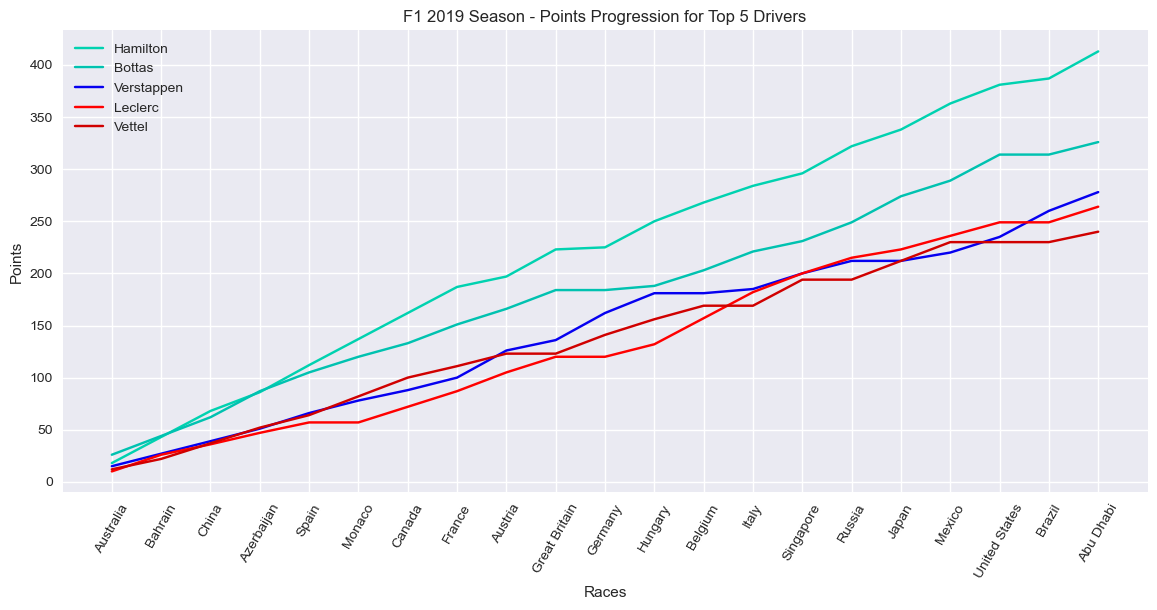

In [36]:
def get_season_progression(arr):
    prg = []
    p = 0
    for i in range(len(arr)):
        p += arr[i]
        prg.append(p)
    return np.array(prg)
races = f1_2019results['Track'].unique()
hamilton = f1_2019results[f1_2019results['Driver'] == 'Lewis Hamilton']['Points'].values
bottas = f1_2019results[f1_2019results['Driver'] == 'Valtteri Bottas']['Points'].values
vettel = f1_2019results[f1_2019results['Driver'] == 'Sebastian Vettel']['Points'].values
leclerc = f1_2019results[f1_2019results['Driver'] == 'Charles Leclerc']['Points'].values
verstappen = f1_2019results[f1_2019results['Driver'] == 'Max Verstappen']['Points'].values
plt.figure(figsize=(14,6))
plt.plot(get_season_progression(hamilton), color='#00d2b0', label='Hamilton')
plt.plot(get_season_progression(bottas), color='#00c2b0', label='Bottas')
plt.plot(get_season_progression(verstappen), color='#0600f0', label='Verstappen')
plt.plot(get_season_progression(leclerc), color='#ff0000', label='Leclerc')
plt.plot(get_season_progression(vettel), color='#d00000', label='Vettel')
plt.title('F1 2019 Season - Points Progression for Top 5 Drivers')
plt.xlabel('Races')
plt.ylabel('Points')
plt.xticks(np.arange(21), races, rotation=60)
plt.legend()
plt.show()

How about the progression for the rest of the drivers?

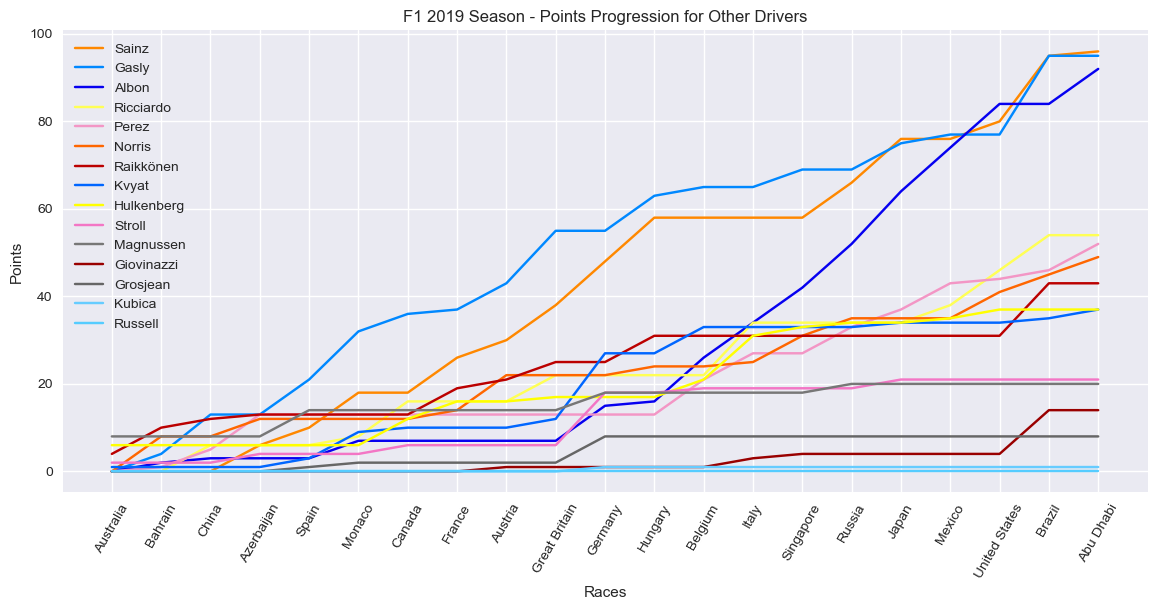

In [37]:
drivers = f1_2019drivers['Driver'].unique()[5:]
drivers_color = ['#ff8800', '#0088ff', '#0600f0', '#ffff55', '#f396c5', '#ff6600', '#bb0000', '#0066ff', '#ffff00',
                 '#f376c5', '#777777', '#990000', '#666666', '#66ccff', '#55ccff']
plt.figure(figsize=(14,6))
for i in range(len(drivers)):
    driver_points = f1_2019results[f1_2019results['Driver'] == drivers[i]]['Points'].values
    plt.plot(get_season_progression(driver_points), color=drivers_color[i], label=drivers[i].split()[1])
plt.title('F1 2019 Season - Points Progression for Other Drivers')
plt.xlabel('Races')
plt.ylabel('Points')
plt.xticks(np.arange(21), races, rotation=60)
plt.legend()
plt.show()

Yeah, these graphs above clearly explain how all drivers gained points this season along. We can imply, however, that there was a **big competition** especially for **mid-teams** where lots of standing changes happened race after race.

If these are all for the drivers, why don't we do the same for the constructors then?

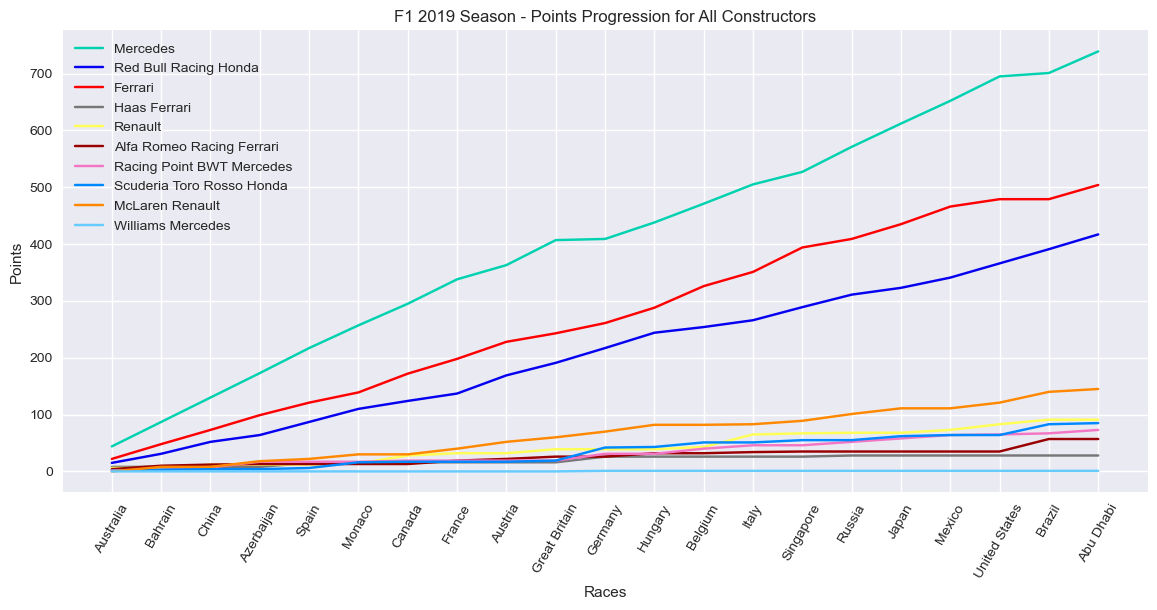

In [38]:
team_points = f1_2019results.pivot_table(index='Track', columns='Team', values='Points', aggfunc='sum')
teams = f1_2019results['Team'].unique()
colors = ['#00d2b0', '#0600f0', '#ff0000', '#777777', '#ffff55', '#990000', '#f376c5', '#0088ff', '#ff8800', '#66ccff']
plt.figure(figsize=(14,6))
for i in range(len(teams)):
    tp = []
    for j in range(len(races)):
        tp.append(team_points.loc[races[j],teams[i]])
    plt.plot(get_season_progression(tp), color=colors[i], label=teams[i])
plt.title('F1 2019 Season - Points Progression for All Constructors')
plt.xlabel('Races')
plt.ylabel('Points')
plt.xticks(np.arange(21), races, rotation=60)
plt.legend()
plt.show()

Similarly, this graph shows why F1 is **getting boring** for the last few seasons. That's because only the **top 3 teams** are eligible for claiming the championship title (same for the drivers, too) and pretending there is **another league** that only encompasess the rest of the teams to be **4th best** constructor overall! Nevertheless, this hasn't changed yet for 2019 season.

Now, another visualization I'd like to make is the **race finish positions** in each race for top 10 drivers in the season standings.

_Here, drivers who were **not classified**  or **disqualified** in the results are considered to finish P20 for this purpose._

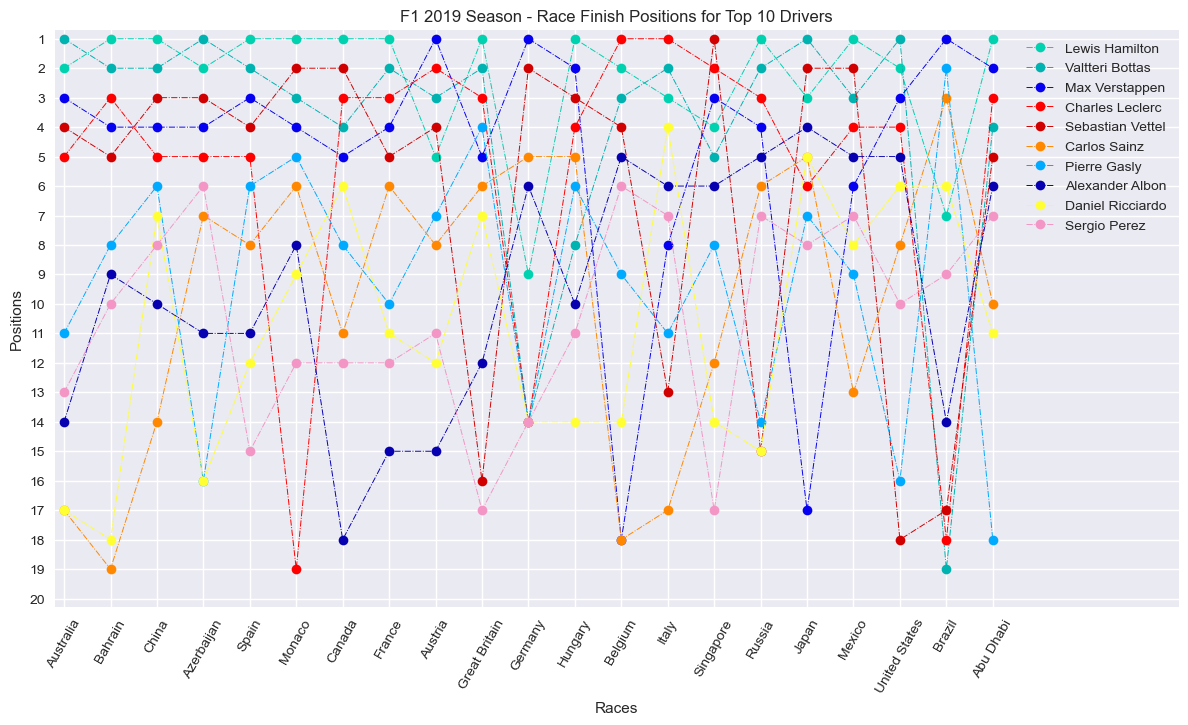

In [40]:
race_results = f1_2019results[['Track', 'Position', 'Driver']]
race_results.replace('NC', '20', inplace=True, method='pad')
race_results.replace('DQ', '20', inplace=True, method='pad')
race_results = race_results.astype({'Position':'int32'}, errors='ignore')
drivers = f1_2019drivers['Driver'].unique()[:10]
colors = ['#00d2b0', '#00b2b0', '#0600f0', '#ff0000', '#d00000', '#ff8800', '#00aaff', '#0600b0', '#ffff33', '#f396c5']
plt.figure(figsize=(14.5,7.5))
plt.axis((-0.2,24,20.3,0.7))
for i in range(len(drivers)):   
    positions = race_results[race_results['Driver'] == drivers[i]]['Position'].values
    plt.plot(positions, color=colors[i], label=drivers[i], marker='o', linewidth=0.7, linestyle='-.')
plt.title('F1 2019 Season - Race Finish Positions for Top 10 Drivers')
plt.xlabel('Races')
plt.ylabel('Positions')
plt.xticks(np.arange(21), races, rotation=60)
plt.yticks(np.arange(1,21))
plt.legend(loc='upper right')
plt.show()

Lastly, I'd like to see **total laps completed** for all drivers this season. Do you remember the related number for total laps? Here it is:

In [41]:
print("Total Number of Laps in 2019 Season:", f1_2019tracks['Number of Laps'].sum())

Total Number of Laps in 2019 Season: 1266


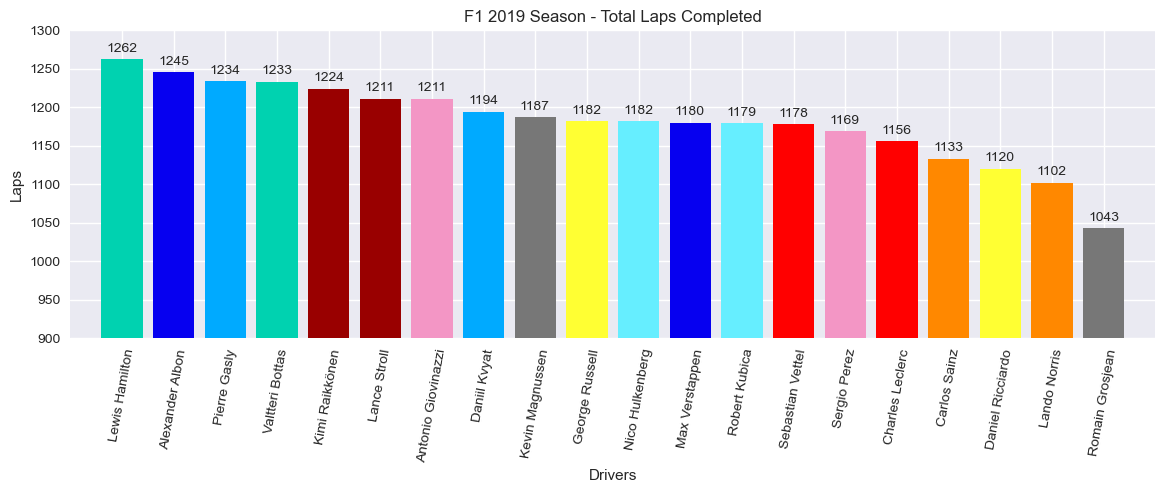

In [42]:
laps = f1_2019results.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
laps = laps.reset_index()
colors = ['#00d2b0', '#0600f0', '#00aaff', '#00d2b0', '#990000', '#990000', '#f396c5', '#00aaff', '#777777', '#ffff33',
          '#66eeff', '#0600f0', '#66eeff', '#ff0000', '#f396c5', '#ff0000', '#ff8800', '#ffff33', '#ff8800', '#777777']
plt.figure(figsize=(14,4))
plt.axis((-1,20,900,1300))
plt.bar(laps['Driver'], laps['Laps'], color=colors)
for i in range(20):
    plt.text(-0.3+i, 10+laps.loc[i,'Laps'], laps.loc[i,'Laps'])
plt.title('F1 2019 Season - Total Laps Completed')
plt.xlabel('Drivers')
plt.ylabel('Laps')
plt.xticks(rotation=80)
plt.show()

By inspecting this good-looking bar graph, **Lewis Hamilton**, who was never out of the race, has driven most of the laps in 2019. The number, **1262** is just 4 laps away from the maximum laps possible this season. Well, I don't remember that he finished any race with lap down. Maybe because, one or two races were organized with **lesser laps** than it normally would be. For this reason, I do remember that _German Grand Prix_ had been completed with **3 less laps**.

This bar graph also shows us that **Romain Grosjean** is the driver who completed the least laps, **1043**. Remind that he had **7 DNFs** this season, which could be unlucky for him.

### **All right, everyone. That concludes Formula 1 - 2019 Season Analysis.**

**I hope you learned many things for Formula 1 in general, drivers and teams this season, if you've come to the bottom end without getting bored.**

**For myself, it's a great opportunity to use my data analysis skills on a real-life dataset, involving one of the most popular motorsport series and present all sensible outcomes with you by text and data visualization. I quite enjoyed the works I've done here while preparing these analyses!**

Certainly, we're looking forward to watching F1's 2020 season with some questions in our mind:

- Which drivers and teams will make a **shocking surprise**?
- Will Hamilton and Mercedes **defend their titles** one more year?
- Will Ferrari or any other team be able to **stop Mercedes' dominance** at last?
- More importantly, will **Hamilton** be able to break the records held by the legend **Michael Schumacher**?
- And, in the worst scenario, will **Coronavirus (Covid-19)** outbreak deliver a significant blow to F1 races, causing them to be postponed or cancelled? (according to the previous news so far, Chinese Grand Prix had been postponed)

**UPDATE:** As Coronavirus has become a **pandemic** outbreak, announced by World Health Organization, more races have been affected, unfortunately. That is, Australian GP has been **cancelled** several hours left before the 1st practice session; plus, **McLaren** was right to withdraw from the race because one team member was affected by the virus! Then, Bahrain and Vietnam Grands Prix have been **postponed**. FIA and Formula 1 authorities said that the new season is expected to start **at the end of May.**


**UPDATE 2:** The Coronavirus outbreak continues **exponentially**, unfortunately. Recently, F1 authorities have decided to postpone more races: These are Netherlands, Spain and Azerbaijan Grands Prix. Plus, Monaco GP will not be organized this year!


**UPDATE 3:** Nowadays, F1 official sources state that 2020 Season is planned to start in July, where the first race will be held in **Austria**. On the other hand, the previous race in the calendar, **French Grand Prix** has been called off! Furthermore, about **British** and **Hungarian GP**, they will be organized as usual but without spectators in the grandstands! While we are still waiting for the season start, many F1 drivers have attended to **Virtual GPs** with some famous people from other sport disciplines. If you've ever come across such an event, you could be glad that the competition is as if it was in real life! Well, we should thank **Codemasters** for making F1 Official Videogames, right?


**UPDATE 4:** The latest news stated that there won't be F1 races in **Azerbaijan**, **Singapore** and **Japan** this year! Well, we only know that the official calendar for 2020 season will be organized in Europe continent first (total of 8 races have been announced), then it will continue to other locations where, in my opinion, Coronavirus did not get worse. Anyway, all teams are now preparing themselves for the start of the new season and looking forward to racing in tracks to show the actions we missed!


**When the new season starts, that's the statement we want to say:**

## It's light out, and away we go for F1 2020 Season!